## CIFAR10(FEEDFORWARD)

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization

import matplotlib.pyplot as plt

In [2]:
cifar10= tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)= cifar10.load_data()
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### jpg dataset

In [5]:
# train_data_dir = 'Datasets/cifar-10-img/train'
# test_data_dir = 'Datasets/cifar-10-img/test'

# # Image data generator for training data
# train_datagen = ImageDataGenerator(
# rescale=1.0/255
# )

# # Image data generator for testing data
# test_datagen = ImageDataGenerator(
# rescale=1.0/255
# )

# # Create data generators
# train_batch_size = 20000
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(32, 32),  # Resize images to 32x32
#     batch_size=train_batch_size,
#     class_mode='sparse', 
#     shuffle=True,
# )

# # Load test data without labels (class_mode=None)
# test_batch_size = 1000
# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=(32, 32),  # Resize images to 32x32
#     batch_size=test_batch_size,
#     class_mode='sparse', 
#     shuffle=True,
# )

In [6]:
# x_train, y_train = train_generator[0]
# x_test, y_test = test_generator[0]

In [7]:
model= Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.summary()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3248 - loss: 1.9099 - val_accuracy: 0.4078 - val_loss: 1.6680
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4341 - loss: 1.5895 - val_accuracy: 0.4410 - val_loss: 1.5792
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4646 - loss: 1.5080 - val_accuracy: 0.4225 - val_loss: 1.6322
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4791 - loss: 1.4609 - val_accuracy: 0.4748 - val_loss: 1.4910
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4973 - loss: 1.4138 - val_accuracy: 0.4443 - val_loss: 1.5476
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5041 - loss: 1.3932 - val_accuracy: 0.4620 - val_loss: 1.5165
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5134 - loss: 1.3664 - val_accuracy: 0.4531 - val_loss: 1.5441
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5271 - loss: 1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,028 (3.17 MB)

 Trainable params: 829,258 (3.16 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2 (12.00 B)

In [9]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print("loss=", test_loss)
print("accuracy=", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4720 - loss: 1.5336
loss= 1.539113163948059
accuracy= 0.46959999203681946


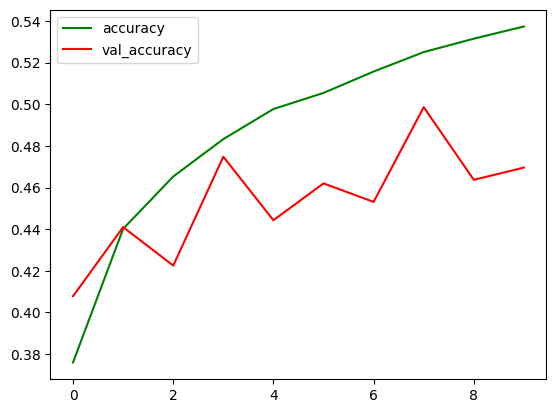

In [10]:
plt.plot(history.history['accuracy'], label='accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='red')
plt.legend()

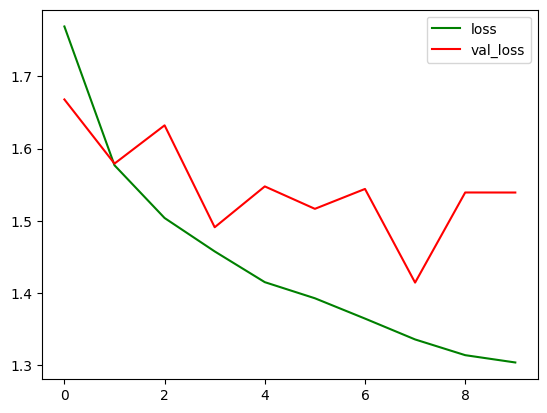

In [11]:
plt.plot(history.history['loss'], label='loss', color='green')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.legend()

In [12]:
# n=20
# plt.imshow(x_test[n])
# predicted_values= model.predict(x_test)
# print("actual=", y_test[n])
# print("predicted=", np.argmax(predicted_values[n]))

In [14]:
# n = 5
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']  # Replace with your actual class names


# plt.imshow(x_test[n])
# plt.title("Actual label")
# plt.show()

# predicted = model.predict(x_test[n].reshape(1, 32, 32, 3))
# actual_label = class_names[np.argmax(y_test[n])]  # Get actual class name
# predicted_label = class_names[np.argmax(predicted)]  # Get predicted class name

# print("Actual ", actual_label)  # Print actual class name
# print("Predicted  ", predicted_label)